<a href="https://colab.research.google.com/github/JoJa171199/ML/blob/main/%5B01%5D%20-%20Preparaci%C3%B3n%20de%20datos%20y%20EDA/EDA_Ejercicio_3_exploracion_nyc_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA - Ejercicio 3: exploracion_nyc_airbnb.ipynb

En este ejercicio realizarás de forma autónoma un análisis exploratorio del dataset de alojamientos de Airbnb en Nueva York.
Aplicarás todas las técnicas vistas en los ejercicios anteriores (tipos de variables, nulos, outliers, correlaciones y visualización).

**Este ejercicio está pensado para que tú lo resuelvas completamente.**

### Objetivos
- Aplicar de forma autónoma las técnicas básicas de EDA.
- Detectar problemas de calidad de datos y patrones relevantes.
- Usar visualizaciones para respaldar observaciones.

### Descripción del dataset
Usaremos el dataset público de Inside Airbnb con los anuncios activos en Nueva York a fecha de agosto de 2024.
Incluye información de precio, ubicación, tipo de habitación, noches mínimas, disponibilidad y valoraciones.

Fuente: [Inside Airbnb - NYC listings](https://data.insideairbnb.com/united-states/ny/new-york-city/2025-08-01/visualisations/listings.csv)

Como Inside Airbnb cambia el enlace con cada nueva release, puede que sea necesario actualizarlo buscandolo en [Inside Airbnb](https://insideairbnb.com/get-the-data/)

In [1]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# Cargar el dataset de Inside Airbnb NYC (comprimido en .csv.gz)
url = 'https://data.insideairbnb.com/united-states/ny/new-york-city/2025-08-01/visualisations/listings.csv'
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,260.0,30,9,2018-10-19,0.08,6,365,0,NaN
1,2595,Skylit Studio Oasis | Midtown Manhattan,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.25,3,365,0,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,98.0,30,195,2025-06-09,0.99,1,1,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,NaN,30,1,2022-06-05,0.03,2,24,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,74.0,30,249,2025-05-27,1.30,1,288,6,NaN


### 1. Información general del dataset

In [7]:
# TODO: Mostrar las dimensiones del dataset y sus primeras filas
print("Dataset dimensions:", df.shape)
display(df.head())

Dataset dimensions: (36403, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,260.0,30,9,2018-10-19,0.08,6,365,0,NaN
1,2595,Skylit Studio Oasis | Midtown Manhattan,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.25,3,365,0,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,98.0,30,195,2025-06-09,0.99,1,1,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,NaN,30,1,2022-06-05,0.03,2,24,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,74.0,30,249,2025-05-27,1.30,1,288,6,NaN


In [10]:
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (36403, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,260.0,30,9,2018-10-19,0.08,6,365,0,NaN
1,2595,Skylit Studio Oasis | Midtown Manhattan,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.25,3,365,0,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,98.0,30,195,2025-06-09,0.99,1,1,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,NaN,30,1,2022-06-05,0.03,2,24,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,74.0,30,249,2025-05-27,1.30,1,288,6,NaN


In [15]:
print(f'Dimensiones del dataset:  {df.shape}')
df.head()

Dimensiones del dataset:  (36403, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2539,Superfast Wi-Fi. Clean & quiet home by the park,2787,John,Brooklyn,Kensington,40.64529,-73.97238,Private room,260.0,30,9,2018-10-19,0.08,6,365,0,NaN
1,2595,Skylit Studio Oasis | Midtown Manhattan,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,47,2022-06-21,0.25,3,365,0,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,98.0,30,195,2025-06-09,0.99,1,1,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kahshanna,Manhattan,East Harlem,40.80107,-73.94255,Private room,NaN,30,1,2022-06-05,0.03,2,24,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cynthia,Manhattan,East Harlem,40.78778,-73.94759,Private room,74.0,30,249,2025-05-27,1.30,1,288,6,NaN


In [55]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.640300e+04,3.640300e+04,36403.000000,36403.000000,21279.000000,36403.000000,36403.000000,25093.000000,36403.000000,36403.000000,36403.000000
mean,4.525526e+17,1.737617e+08,40.728443,-73.947333,447.871611,28.617916,26.851056,0.816339,63.409362,161.655166,4.008818
std,5.320711e+17,1.922877e+08,0.056336,0.055033,3174.205888,29.288631,68.388895,1.878461,202.489229,147.346919,19.893298
min,2.539000e+03,1.678000e+03,40.500366,-74.251907,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.147279e+07,1.777536e+07,40.688320,-73.983517,90.000000,30.000000,0.000000,0.080000,1.000000,0.000000,0.000000
50%,5.054072e+07,8.623393e+07,40.726140,-73.954980,150.000000,30.000000,3.000000,0.250000,2.000000,153.000000,0.000000
75%,9.550924e+17,3.064218e+08,40.762120,-73.928060,257.000000,30.000000,22.000000,0.920000,9.000000,318.000000,1.000000
max,1.477746e+18,7.105870e+08,40.911390,-73.711822,50052.000000,1124.000000,3518.000000,123.870000,1087.000000,365.000000,1771.000000


In [17]:
# TODO: Verifica el tipo de variables con df.dtypes
# ¿Hay columnas que no sean útiles para el análisis? ¿ID, nombres, etc.?
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### 2. Análisis de nulos y duplicados

In [28]:
# TODO: Calcula el % de nulos por columna y muestra solo las columnas con más del 10%
df_null = df.isnull().mean().sort_values(ascending=False)*100
df_null[df_null>10]

,0
license,84.984754
price,41.546026
reviews_per_month,31.068868
last_review,31.068868


In [47]:
# TODO: Verifica si hay filas duplicadas
df.duplicated().astype(int).sum()

np.int64(0)

### 3. Análisis univariado (distribuciones)

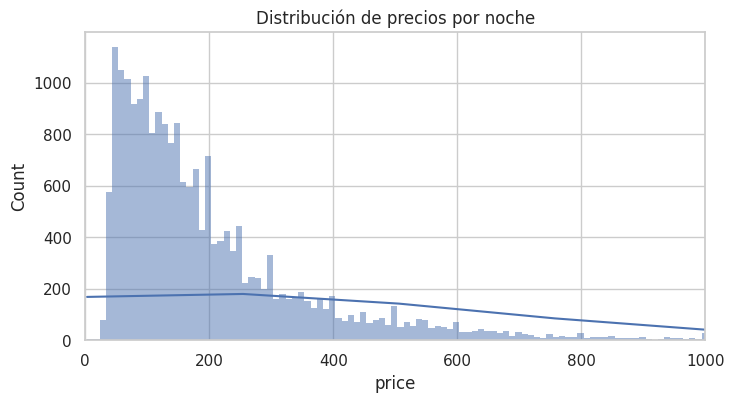

In [62]:
# TODO: Visualiza la distribución de precios con histograma y límite razonable (por ejemplo, hasta $500)
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=5000, kde=True)
plt.title('Distribución de precios por noche')
plt.xlim(0, 1000)
plt.show()

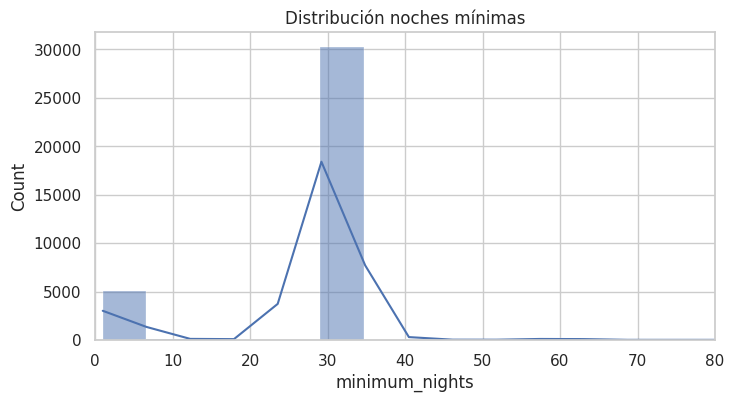

In [73]:
# TODO: Explora también la distribución de minimum_nights y availability_365
# Limita los ejes si hay outliers muy extremos
plt.figure(figsize=(8,4))
sns.histplot(df['minimum_nights'], bins=200, kde=True)
plt.title('Distribución noches mínimas')
plt.xlim(0, 80)
plt.show()


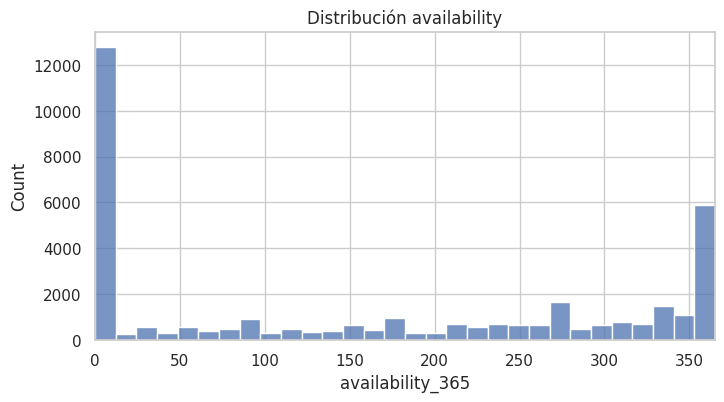

In [80]:
plt.figure(figsize=(8,4))
sns.histplot(df['availability_365'], bins=30, kde= False)
plt.title('Distribución availability')
plt.xlim(0, 365)
plt.show()

### 4. Análisis de outliers

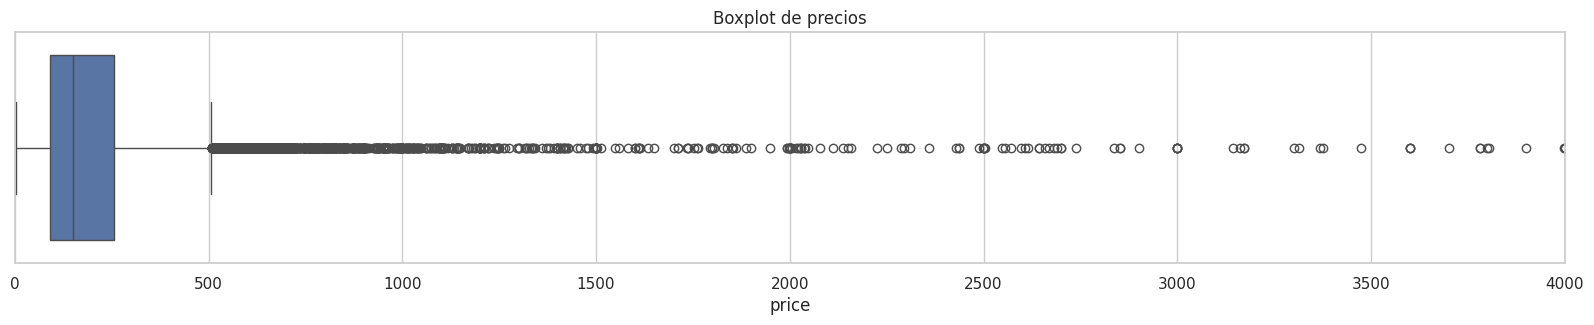

In [84]:
# TODO: Crea un boxplot de precios para detectar outliers
plt.figure(figsize=(20,3))
sns.boxplot(x=df['price'])
plt.title('Boxplot de precios')
plt.xlim(0, 4000)
plt.show()

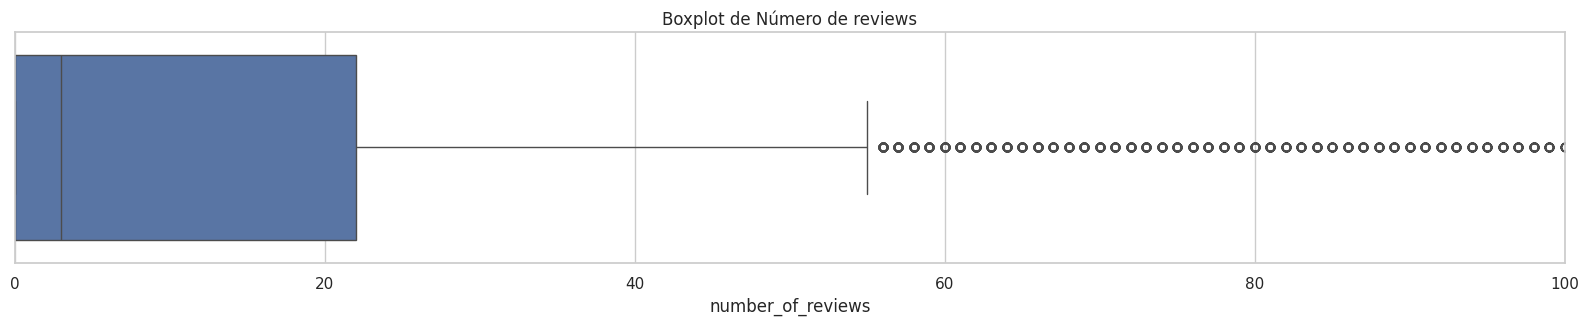

In [87]:
# TODO: Crea otro boxplot con otra variable numérica relevante (por ejemplo, number_of_reviews)
plt.figure(figsize=(20,3))
sns.boxplot(x=df['number_of_reviews'])
plt.title('Boxplot de Número de reviews')
plt.xlim(0, 100)
plt.show()

### 5. Análisis geográfico

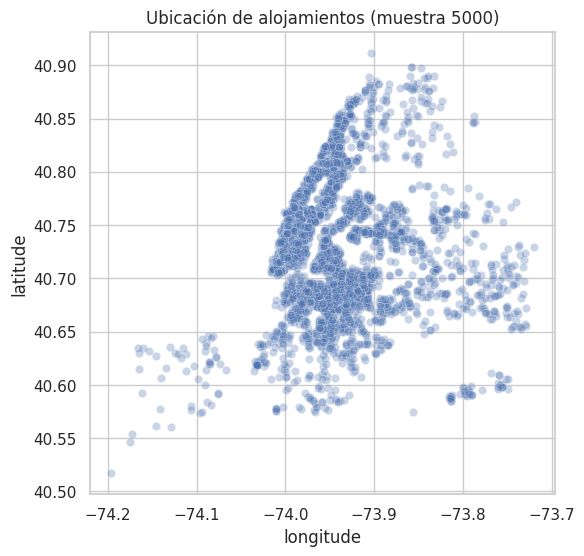

In [91]:
# TODO: Representa la ubicación de los alojamientos con un scatterplot usando longitude y latitude
# Usa una muestra aleatoria de ~5000 filas si es necesario
plt.figure(figsize=(6,6))
sns.scatterplot(data=df.sample(5000), x='longitude', y='latitude', alpha=0.3)
plt.title('Ubicación de alojamientos (muestra 5000)')
plt.show()

### 6. Análisis de correlaciones

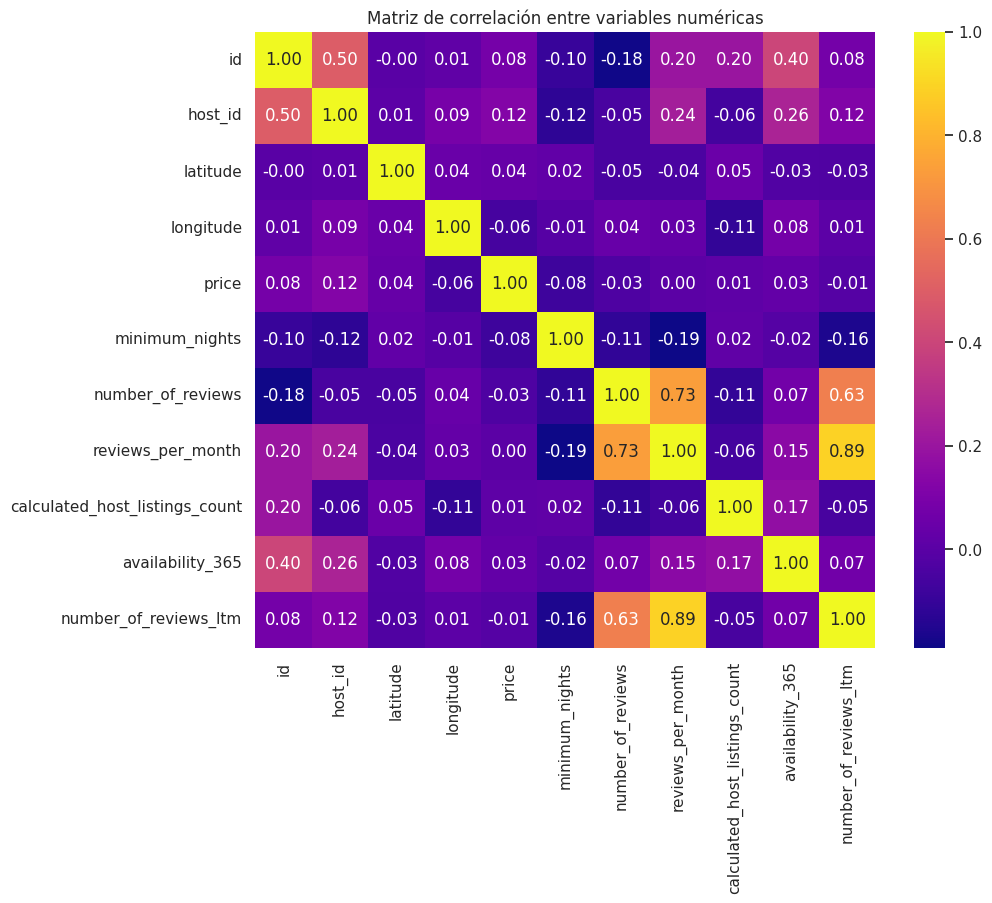

In [93]:
# TODO: Calcula la matriz de correlación y represéntala con heatmap
# Usa solo variables numéricas
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='plasma', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [98]:
# TODO: Muestra las correlaciones más fuertes ordenadas (en valor absoluto)
# Pista: usa .unstack(), .abs(), .sort_values()
corr_abs = corr.unstack().abs()
corr_abs.sort_values(ascending=False)[corr_abs<1]
#quitar duplicados
corr_abs.sort_values(ascending=False)[corr_abs<1].drop_duplicates()

reviews_per_month               number_of_reviews_ltm             0.891747
number_of_reviews               reviews_per_month                 0.730885
number_of_reviews_ltm           number_of_reviews                 0.626350
id                              host_id                           0.496807
                                availability_365                  0.403693
availability_365                host_id                           0.258314
host_id                         reviews_per_month                 0.235087
calculated_host_listings_count  id                                0.198661
id                              reviews_per_month                 0.197052
minimum_nights                  reviews_per_month                 0.189995
number_of_reviews               id                                0.184366
availability_365                calculated_host_listings_count    0.171155
minimum_nights                  number_of_reviews_ltm             0.159653
availability_365                reviews_per_month                 0.146182
host_id                         minimum_nights                    0.124312
price                           host_id                           0.124233
host_id                         number_of_reviews_ltm             0.118189
number_of_reviews               minimum_nights                    0.112964
calculated_host_listings_count  longitude                         0.110598
number_of_reviews               calculated_host_listings_count    0.109827
minimum_nights                  id                                0.095003
host_id                         longitude                         0.086644
price                           id                                0.081365
minimum_nights                  price                             0.079819
longitude                       availability_365                  0.075715
number_of_reviews_ltm           id                                0.075653
number_of_reviews               availability_365                  0.073582
availability_365                number_of_reviews_ltm             0.068929
host_id                         calculated_host_listings_count    0.062454
calculated_host_listings_count  reviews_per_month                 0.062393
price                           longitude                         0.058350
calculated_host_listings_count  number_of_reviews_ltm             0.051703
                                latitude                          0.051627
latitude                        number_of_reviews                 0.050336
number_of_reviews               host_id                           0.046593
latitude                        longitude                         0.044692
                                reviews_per_month                 0.042875
number_of_reviews               longitude                         0.039073
latitude                        price                             0.035382
price                           number_of_reviews                 0.034648
number_of_reviews_ltm           latitude                          0.029624
longitude                       reviews_per_month                 0.028937
availability_365                price                             0.027034
latitude                        availability_365                  0.026305
minimum_nights                  latitude                          0.022780
availability_365                minimum_nights                    0.017971
minimum_nights                  calculated_host_listings_count    0.016682
price                           number_of_reviews_ltm             0.014753
longitude                       id                                0.014615
calculated_host_listings_count  price                             0.013038
longitude                       number_of_reviews_ltm             0.008947
minimum_nights                  longitude                         0.008904
latitude                        host_id                           0.005489
price                    

### 7. Análisis de relaciones entre variables

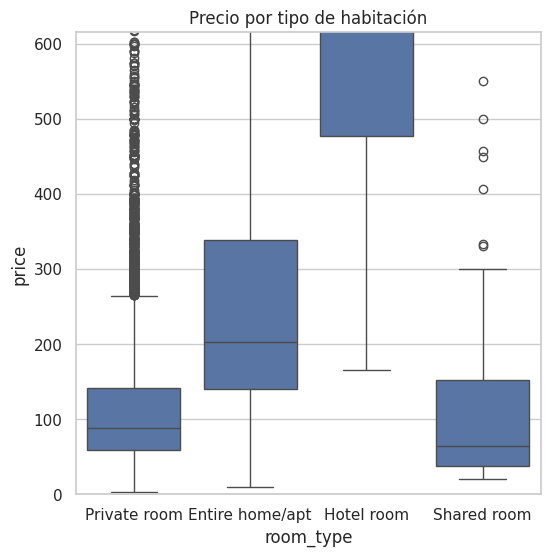

In [100]:
# TODO: Compara el precio según tipo de habitación con boxplot
# Eje x: room_type | Eje y: price
# Aplica límites al eje y si hay outliers
plt.figure(figsize=(6,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Precio por tipo de habitación')
plt.ylim(0, df['price'].quantile(0.95))
plt.show()


Text(0.5, 1.0, 'Número de alojamientos por barrio')

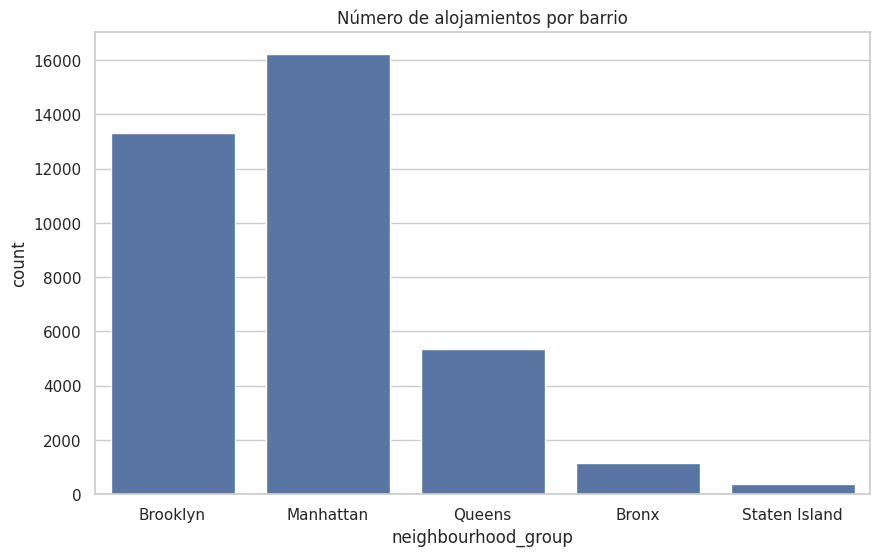

In [103]:
# TODO: Crea un countplot del número de alojamientos por barrio (neighbourhood_group o similar)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood_group', data=df)
plt.title('Número de alojamientos por barrio')

### Conclusión
Resume en una celda markdown los principales hallazgos de tu análisis: variables con problemas de calidad, patrones detectados, correlaciones destacadas y qué variables podrían ser útiles para modelos de predicción.